In [1]:
import re
from os.path import join
from IPython.display import display

import matplotlib.pyplot as plt
import joblib
import pandas as pd
import numpy as np
import torch
import torch.utils.data as data_utils

from lolip.models.torch_utils.archs import *
from lolip.variables import auto_var
from lolip.utils import estimate_local_lip_v2
from params import mnistLip, cifarLip, svhnLip, mnistOtherLips
from utils import params_to_dataframe

TEX_DIR = "./tex_files"

auto_var.set_logging_level(0)

In [2]:
def get_model_name(model_name, hyper=None):
    if 'advkld' in model_name:
        return 'AT(KLD)'
    elif 'advce' in model_name:
        return 'AT(CE)'
    elif 'ptrades6' in model_name:
        return 'PTRADE(6)'
    elif 'ptrades10' in model_name:
        return 'PTRADE(10)'
    elif 'ptrades' in model_name:
        return 'PTRADE(1)'
    elif 'trades6' in model_name:
        return 'TRADE(6)'
    elif 'trades10' in model_name:
        return 'TRADE(10)'
    elif 'trades' in model_name:
        return 'TRADE(1)'
    elif 'cure' in model_name:
        return 'CURE'
    elif 'llr' in model_name:
        return 'LLR'
    elif 'gr' in model_name:
        return 'GR'
    else:
        return 'Natural'

In [3]:
_, _, grid_params, _ = mnistLip()()
df = params_to_dataframe(grid_params,
                         columns=['trn_acc', 'tst_acc', 'adv_trn_acc', 'adv_tst_acc', 'avg_trn_lip', 'avg_tst_lip'],
                         result_file_dir='./results/experiment01/',
                         logging_level=0)
_, _, grid_params, _ = mnistOtherLips()()
add_df = params_to_dataframe(grid_params,
                         columns=['avg_trn_lip_1', 'avg_tst_lip_1', 'avg_trn_lip_kl', 'avg_tst_lip_kl'],
                         result_file_dir='./results/experiment03/',
                         logging_level=0)

df = df.merge(add_df, how="left", on=['model', 'dataset', 'attack', 'norm', 'eps', 'random_seed'])

df['arch'] = df['model'].apply(lambda a: a.split("-")[2])
df['loss_name'] = df['model'].apply(lambda a: get_model_name(a.split("-")[0]))
df['gen_gap'] = df['trn_acc'] - df['tst_acc']

for name, d in df.groupby(["dataset", "arch"]):
    print(name)
    display(d)

E0103 01:07:22.733369 139792043726656 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'mnist', 'eps': 0.1, 'model': 'trades16ce-tor-CNN001', 'norm': 'inf', 'random_seed': 0}


problem with ./results/experiment01/pgd-mnist-0.1-trades16ce-tor-CNN001-inf-0.pkl


E0103 01:07:25.242573 139792043726656 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'fashion', 'eps': 0.1, 'model': 'trades20ce-tor-CNN002', 'norm': 'inf', 'random_seed': 0}


problem with ./results/experiment01/pgd-fashion-0.1-trades20ce-tor-CNN002-inf-0.pkl
('fashion', 'CNN001')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,avg_trn_lip_1,avg_tst_lip_1,avg_trn_lip_kl,avg_tst_lip_kl,arch,loss_name,gen_gap
12,pgd,fashion,0.1,ce-tor-CNN001,inf,0,0.999533,0.9263,0.008750,0.0558,76.034775,76.180283,204.332310,204.192862,0.008168,0.119394,CNN001,Natural,0.073233
13,pgd,fashion,0.1,trades6ce-tor-CNN001,inf,0,0.976017,0.9194,0.503983,0.5260,8.076009,8.072925,NaN,NaN,NaN,NaN,CNN001,TRADE(6),0.056617
14,pgd,fashion,0.1,trades10ce-tor-CNN001,inf,0,0.963883,0.9130,0.571000,0.5846,5.593621,5.636191,15.873977,15.949849,0.001849,0.002151,CNN001,TRADE(10),0.050883
15,pgd,fashion,0.1,trades20ce-tor-CNN001,inf,0,0.991350,0.9289,0.184950,0.1820,24.923288,24.717207,58.618327,58.592183,0.029898,0.040551,CNN001,TRADE(1),0.062450
16,pgd,fashion,0.1,ptrades10ce-tor-CNN001,inf,0,0.887583,0.8710,0.722033,0.7006,1.462121,1.473641,4.300258,4.319522,0.000129,0.000145,CNN001,PTRADE(10),0.016583
17,pgd,fashion,0.1,curece-tor-CNN001,inf,0,0.999983,0.9249,0.121383,0.1164,21.406277,21.328899,NaN,NaN,NaN,NaN,CNN001,CURE,0.075083
18,pgd,fashion,0.1,cure14ce-tor-CNN001,inf,0,0.988550,0.9193,0.312183,0.3034,4.766493,4.769518,NaN,NaN,NaN,NaN,CNN001,CURE,0.069250
19,pgd,fashion,0.1,advce-tor-CNN001,inf,0,0.888167,0.8686,0.787350,0.7610,1.136331,1.133796,3.491564,3.520285,0.000109,0.000125,CNN001,AT(CE),0.019567
20,pgd,fashion,0.1,llrce-tor-CNN001,inf,0,0.975550,0.9157,0.393817,0.4215,9.833105,9.933347,28.710825,28.955185,0.000633,0.001889,CNN001,LLR,0.059850
21,pgd,fashion,0.1,gr4ce-tor-CNN001,inf,0,0.998617,0.9273,0.006983,0.0082,64.118690,63.715668,NaN,NaN,NaN,NaN,CNN001,GR,0.071317


('fashion', 'CNN002')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,avg_trn_lip_1,avg_tst_lip_1,avg_trn_lip_kl,avg_tst_lip_kl,arch,loss_name,gen_gap
34,pgd,fashion,0.1,ce-tor-CNN002,inf,0,0.999833,0.9250,0.062883,0.1130,61.905163,62.749039,163.845928,164.451033,0.013651,0.179822,CNN002,Natural,0.074833
35,pgd,fashion,0.1,trades10ce-tor-CNN002,inf,0,0.957200,0.9117,0.565500,0.5778,4.726114,4.696544,NaN,NaN,NaN,NaN,CNN002,TRADE(10),0.045500
36,pgd,fashion,0.1,curece-tor-CNN002,inf,0,0.990550,0.9251,0.341500,0.3357,8.233693,8.232644,21.719237,21.639423,0.008476,0.013228,CNN002,CURE,0.065450
37,pgd,fashion,0.1,advce-tor-CNN002,inf,0,0.882750,0.8642,0.801450,0.7793,0.601427,0.606910,NaN,NaN,NaN,NaN,CNN002,AT(CE),0.018550
38,pgd,fashion,0.1,llrce-tor-CNN002,inf,0,0.958250,0.9176,0.531017,0.5369,3.877496,3.932195,10.795508,10.928507,0.000481,0.001107,CNN002,LLR,0.040650
39,pgd,fashion,0.1,gr4ce-tor-CNN002,inf,0,0.999850,0.9254,0.057533,0.0586,60.507854,60.454620,NaN,NaN,NaN,NaN,CNN002,GR,0.074450
40,pgd,fashion,0.1,kld-tor-CNN002,inf,0,0.999883,0.9229,0.053600,0.0523,61.968571,62.800114,NaN,NaN,NaN,NaN,CNN002,Natural,0.076983
41,pgd,fashion,0.1,advkld-tor-CNN002,inf,0,0.882033,0.8646,0.802083,0.7799,0.586340,0.587307,1.799110,1.826234,0.000104,0.000100,CNN002,AT(KLD),0.017433


('mnist', 'CNN001')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,avg_trn_lip_1,avg_tst_lip_1,avg_trn_lip_kl,avg_tst_lip_kl,arch,loss_name,gen_gap
0,pgd,mnist,0.1,ce-tor-CNN001,inf,0,1.000000,0.9920,0.408133,0.4183,24.914808,25.083706,66.886009,67.246512,9.009926e-05,0.004028,CNN001,Natural,0.008000
1,pgd,mnist,0.1,trades6ce-tor-CNN001,inf,0,0.999967,0.9924,0.919833,0.9062,5.737867,5.748982,NaN,NaN,NaN,NaN,CNN001,TRADE(6),0.007567
2,pgd,mnist,0.1,trades10ce-tor-CNN001,inf,0,0.999967,0.9931,0.921550,0.9043,5.052001,5.040387,15.550260,15.629252,6.975706e-06,0.000120,CNN001,TRADE(10),0.006867
3,pgd,mnist,0.1,trades20ce-tor-CNN001,inf,0,0.999950,0.9926,0.779617,0.7765,6.164055,6.192739,18.399490,18.533056,1.688437e-05,0.000294,CNN001,TRADE(1),0.007350
4,pgd,mnist,0.1,ptrades10ce-tor-CNN001,inf,0,0.996633,0.9916,0.963867,0.9412,2.875616,2.898354,8.540659,8.618951,1.526326e-05,0.000066,CNN001,PTRADE(10),0.005033
5,pgd,mnist,0.1,curece-tor-CNN001,inf,0,1.000000,0.9927,0.979667,0.9456,2.695466,2.684681,7.789734,7.813998,1.020349e-05,0.000149,CNN001,CURE,0.007300
6,pgd,mnist,0.1,cure14ce-tor-CNN001,inf,0,1.000000,0.9908,0.845617,0.8427,4.352627,4.355541,NaN,NaN,NaN,NaN,CNN001,CURE,0.009200
7,pgd,mnist,0.1,advce-tor-CNN001,inf,0,0.999817,0.9931,0.996100,0.9617,2.771575,2.795055,8.730167,8.840337,6.501647e-07,0.000088,CNN001,AT(CE),0.006717
8,pgd,mnist,0.1,llrce-tor-CNN001,inf,0,0.999983,0.9934,0.860450,0.8399,12.434842,12.424883,33.917080,34.063950,4.330360e-07,0.000391,CNN001,LLR,0.006583
9,pgd,mnist,0.1,gr4ce-tor-CNN001,inf,0,0.999983,0.9917,0.398800,0.4015,19.069645,19.238735,NaN,NaN,NaN,NaN,CNN001,GR,0.008283


('mnist', 'CNN002')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,avg_trn_lip_1,avg_tst_lip_1,avg_trn_lip_kl,avg_tst_lip_kl,arch,loss_name,gen_gap
24,pgd,mnist,0.1,ce-tor-CNN002,inf,0,1.000000,0.9951,0.794500,0.8053,9.913164,9.871323,23.046890,23.062061,5.872979e-06,0.000868,CNN002,Natural,0.004900
25,pgd,mnist,0.1,trades10ce-tor-CNN002,inf,0,0.999967,0.9956,0.972250,0.9555,2.740302,2.781202,NaN,NaN,NaN,NaN,CNN002,TRADE(10),0.004367
26,pgd,mnist,0.1,trades20ce-tor-CNN002,inf,0,1.000000,0.9950,0.927333,0.9194,3.896791,3.936421,NaN,NaN,NaN,NaN,CNN002,TRADE(1),0.005000
27,pgd,mnist,0.1,curece-tor-CNN002,inf,0,1.000000,0.9949,0.982200,0.9565,2.690739,2.680557,7.668841,7.633935,2.232557e-05,0.000119,CNN002,CURE,0.005100
28,pgd,mnist,0.1,cure14ce-tor-CNN002,inf,0,1.000000,0.9950,0.932983,0.9207,3.664297,3.655739,NaN,NaN,NaN,NaN,CNN002,CURE,0.005000
29,pgd,mnist,0.1,advce-tor-CNN002,inf,0,0.999817,0.9948,0.998383,0.9737,2.185941,2.200780,NaN,NaN,NaN,NaN,CNN002,AT(CE),0.005017
30,pgd,mnist,0.1,llrce-tor-CNN002,inf,0,1.000000,0.9958,0.961800,0.9436,3.779049,3.814385,9.077055,9.068392,9.611180e-08,0.000073,CNN002,LLR,0.004200
31,pgd,mnist,0.1,gr4ce-tor-CNN002,inf,0,1.000000,0.9955,0.803033,0.8121,9.458631,9.469986,NaN,NaN,NaN,NaN,CNN002,GR,0.004500
32,pgd,mnist,0.1,kld-tor-CNN002,inf,0,1.000000,0.9954,0.785767,0.7900,9.389672,9.381055,NaN,NaN,NaN,NaN,CNN002,Natural,0.004600
33,pgd,mnist,0.1,advkld-tor-CNN002,inf,0,0.999833,0.9951,0.998400,0.9729,2.131034,2.160143,5.817267,5.861145,-1.727219e-07,0.000015,CNN002,AT(KLD),0.004733


In [4]:
col_name = {
    'trn_acc': 'trn acc',
    'tst_acc': 'tst acc',
    'adv_trn_acc': 'adv trn acc',
    'adv_tst_acc': 'adv tst acc',
    'adv_trn_acc': 'trn lip (KL)',
    'adv_tst_acc': 'tst lip (KL)',
}

def output_latex(df):
    for name, d in df.groupby(["dataset", "arch"]):
        d = d.set_index('loss_name')
        d = d[['trn_acc', 'tst_acc', 'gen_gap', 'adv_trn_acc', 'adv_tst_acc', 'avg_trn_lip_kl', 'avg_tst_lip_kl']]
        df = df.rename(columns=col_name)
        tex = d.to_latex(index=True, float_format="%.4f", column_format="lcccccc")
        with open(join(TEX_DIR, "_".join(name)+"_tab.tex"), "w") as f:
            f.write(tex)
output_latex(df)

NameError: name 'df' is not defined

In [14]:
_, _, grid_params, _ = cifarLip()()
params_to_dataframe(grid_params, columns=['trn_acc', 'tst_acc', 'adv_trn_acc', 'adv_tst_acc', 'avg_trn_lip', 'avg_tst_lip'], result_file_dir='./results/experiment01/')

I0102 21:45:20.569128 140088625514304 auto_var.py:261] Running time: 0.005175
I0102 21:45:20.665639 140088625514304 auto_var.py:261] Running time: 0.001745
E0102 21:45:20.841800 140088625514304 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'cifar10', 'eps': 0.031, 'model': 'curece-tor-WRN_40_10', 'norm': 'inf', 'random_seed': 0}
I0102 21:45:20.846908 140088625514304 auto_var.py:261] Running time: 0.003199
E0102 21:45:21.015034 140088625514304 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'cifar10', 'eps': 0.031, 'model': 'llrce-tor-WRN_40_10', 'norm': 'inf', 'random_seed': 0}
I0102 21:45:21.016218 140088625514304 auto_var.py:261] Running time: 0.000031


problem with ./results/experiment01/pgd-cifar10-0.031-curece-tor-WRN_40_10-inf-0.pkl
problem with ./results/experiment01/pgd-cifar10-0.031-llrce-tor-WRN_40_10-inf-0.pkl


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip
0,pgd,cifar10,0.031,ce-tor-WRN_40_10,inf,0,1.00000,0.8862,0.00000,0.0681,103.132339,106.384285
1,pgd,cifar10,0.031,trades6ce-tor-WRN_40_10,inf,0,0.98164,0.8265,0.46736,0.4160,9.082851,8.304525
2,pgd,cifar10,0.031,advce-tor-WRN_40_10,inf,0,0.99982,0.7400,0.99694,0.3308,5.454242,5.681854


In [3]:
_, _, grid_params, _ = svhnLip()()
params_to_dataframe(grid_params, columns=['trn_acc', 'tst_acc', 'adv_trn_acc', 'adv_tst_acc', 'avg_trn_lip', 'avg_tst_lip'], result_file_dir='./results/experiment01/')

I0102 22:23:51.996541 140087866783552 auto_var.py:261] Running time: 0.003104
I0102 22:23:52.073389 140087866783552 auto_var.py:261] Running time: 0.001121
I0102 22:23:52.140733 140087866783552 auto_var.py:261] Running time: 0.000923
I0102 22:23:52.212629 140087866783552 auto_var.py:261] Running time: 0.005122
I0102 22:23:52.287552 140087866783552 auto_var.py:261] Running time: 0.000884
E0102 22:23:52.428559 140087866783552 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'svhn', 'eps': 0.031, 'model': 'gr1e3ce-tor-WRN_40_10', 'norm': 'inf', 'random_seed': 0}
E0102 22:23:52.493368 140087866783552 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'svhn', 'eps': 0.031, 'model': 'advkld-tor-WRN_40_10', 'norm': 'inf', 'random_seed': 0}


problem with ./results/experiment01/pgd-svhn-0.031-gr1e3ce-tor-WRN_40_10-inf-0.pkl
problem with ./results/experiment01/pgd-svhn-0.031-advkld-tor-WRN_40_10-inf-0.pkl


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip
0,pgd,svhn,0.031,ce-tor-WRN_40_10,inf,0,0.999986,0.958474,0.034290,0.024700,48.150909,48.617779
1,pgd,svhn,0.031,trades6ce-tor-WRN_40_10,inf,0,0.991318,0.960164,0.434675,0.391902,9.556593,9.584491
2,pgd,svhn,0.031,curece-tor-WRN_40_10,inf,0,0.910029,0.907230,0.195585,0.190535,5.777227,5.557568
3,pgd,svhn,0.031,advce-tor-WRN_40_10-lrem2,inf,0,0.952005,0.924478,0.724682,0.550860,3.642485,3.780584
4,pgd,svhn,0.031,llrce-tor-WRN_40_10,inf,0,0.999973,0.951214,0.345632,0.306238,17.138792,18.932571


In [3]:
def output_latex(df):
    for name, d in df.groupby(["dataset", "arch"]):
        d = d.set_index('month_name')
        print(name)
        d = d[['trn_acc', 'tst_acc', 'adv_trn_acc', 'adv_tst_acc', 'avg_trn_lip', 'avg_tst_lip']]
        tex = d.to_latex(index=True, float_format="%%.4f", column_format="lcccccc")
        with open(join(TEX_DIR, name.join("_")+"_tab.tex"), "w") as f:
            f.write(tex)
output_latex(df)

NameError: name 'df' is not defined

In [5]:
def get_arch(path):
    return path.split("-")[path.split("-").index('tor')+1]

def get_ds(path):
    return path.split("-")[1]

def predict_real(model, X):
    X = X.transpose(0, 3, 1, 2)
    dataset = data_utils.TensorDataset(torch.from_numpy(X).float())
    loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False, num_workers=2)
    ret = []
    for [x] in loader:
        ret.append(model(x.to('cuda')).detach().cpu().numpy())
    return np.concatenate(ret, axis=0)

def calc_lip(model, X, Xp, top_norm, btm_norm):
    top = np.linalg.norm(predict_real(model, X)-predict_real(model, Xp), ord=top_norm, axis=1)
    down = np.linalg.norm(X.reshape(len(Xp), -1)-Xp.reshape(len(Xp), -1), ord=btm_norm, axis=1)
    return top / (down+1e-6)

def get_lip(model, X, top_norm=2, btm_norm=2, epsilon=1.0):
    lip = estimate_local_lip_v2(model, X, top_norm=top_norm, btm_norm=btm_norm, epsilon=epsilon)
    lip_ = calc_lip(model, X, lip, top_norm=top_norm, btm_norm=btm_norm)
    return lip_

class ModelWrapper():
    def __init__(self, model):
        self.model = model
    def predict_real(self, X):
        return predict_real(self.model, X)
    def predict(self, X):
        return predict_real(self.model, X).argmax(axis=1)

(array([9.1500e+03, 3.0649e+04, 1.7223e+04, 2.7470e+03, 2.1800e+02,
        1.2000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.],
       dtype=float32),
 <a list of 10 Patch objects>)

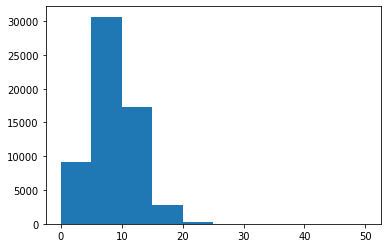

In [23]:
model_path = "./models/pgd-mnist-0.1-advce-tor-CNN001-inf-0.pt"
model = globals()[get_arch(model_path)](n_classes=10)
model.load_state_dict(torch.load(model_path))
model.eval()
model.cuda()
trnX, trny, tstX, tsty = auto_var.get_var_with_argument("dataset", get_ds(model_path))

a = joblib.load("./results/experiment03/pgd-mnist-0.1-advce-tor-CNN001-inf-0.pkl")
lip_ = calc_lip(model, trnX, a['trn_lip_1_pert'], top_norm=1, btm_norm=np.inf)
plt.hist(lip_, range=(0, 50))


In [25]:
Xs = []
for eps in [0.4, 0.6, 0.8, 1.0, 1.2]:
    Xs.append(estimate_local_lip_v2(model, trnX[:10], top_norm=1, btm_norm=np.inf, epsilon=eps))

(array([1.5200e+02, 6.5120e+03, 2.2573e+04, 2.0928e+04, 7.5230e+03,
        1.8900e+03, 3.4400e+02, 6.7000e+01, 8.0000e+00, 2.0000e+00]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.],
       dtype=float32),
 <a list of 10 Patch objects>)

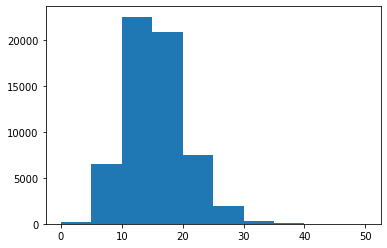

In [22]:
model_path = "./models/pgd-mnist-0.1-trades10ce-tor-CNN001-inf-0.pt"
model = globals()[get_arch(model_path)](n_classes=10)
model.load_state_dict(torch.load(model_path))
model.eval()
model.cuda()
trnX, trny, tstX, tsty = auto_var.get_var_with_argument("dataset", get_ds(model_path))

a = joblib.load("./results/experiment03/pgd-mnist-0.1-trades10ce-tor-CNN001-inf-0.pkl")
lip_ = calc_lip(model, trnX, a['trn_lip_1_pert'], top_norm=1, btm_norm=np.inf)
plt.hist(lip_, range=(0, 50))


[10.795519   9.563145   7.785195  ...  9.9654455  7.2449346 10.036863 ]


(array([5.3420e+03, 1.6160e+04, 1.9820e+04, 1.2501e+04, 4.6880e+03,
        1.1830e+03, 2.4400e+02, 5.1000e+01, 7.0000e+00, 4.0000e+00]),
 array([ 1.0522541,  4.1215   ,  7.190746 , 10.259992 , 13.329238 ,
        16.398483 , 19.46773  , 22.536976 , 25.60622  , 28.675467 ,
        31.744713 ], dtype=float32),
 <a list of 10 Patch objects>)

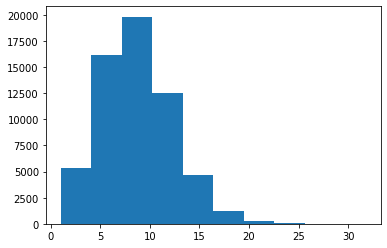

In [32]:
lip_ = get_lip(model, trnX)

0.0775341446240743


In [4]:
np.attacks.torch.projected_gradient_descent import ProjectedGradientDescent
nb_iter=10
attack_model = ProjectedGradientDescent(
    model_fn=model,
    norm=np.inf,
    eps=0.1,
    eps_iter=0.1*2/nb_iter,
    nb_iter=nb_iter,
)

adv_trnX = attack_model.perturb(trnX)
adv_tstX = attack_model.perturb(tstX)
print((ModelWrapper(model).predict(trnX) == trny).mean())
print((ModelWrapper(model).predict(adv_trnX) == trny).mean())

SyntaxError: invalid syntax (<ipython-input-4-319c90070ab9>, line 1)

In [17]:
ModelWrapper(model).predict(trnX)

array([5, 0, 4, ..., 5, 6, 8])

In [16]:
a = joblib.load("results/experiment01/pgd-fashion-0.1-advce-tor-CNN002-inf-0.pkl")
a['history'][-5]


{'epoch': 156,
 'trn_loss': 0.4567526239236196,
 'trn_acc': 0.81165,
 'tst_loss': 0.3531107112646103,
 'tst_acc': 0.8642}

In [11]:
#a = joblib.load("./results/experiment01/pgd-fashion-0.1-advkld-tor-CNN002-inf-0.pkl")
a = joblib.load("./results/experiment01/pgd-svhn-0.031-advce-tor-WRN_40_10-lrem2-inf-0.pkl")
a['trn_acc']

0.9520045865924075

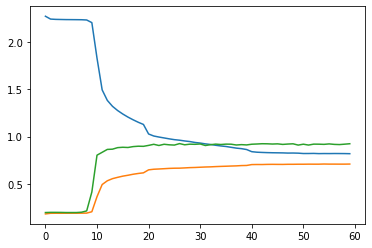

In [10]:
plt.plot([h['trn_loss'] for h in a['history']])
plt.plot([h['trn_acc'] for h in a['history']])
plt.plot([h['tst_acc'] for h in a['history']])

In [57]:
from scipy.special import kl_div

def kld(p, q):
    return p * np.log(p/q) + (1-p) * np.log((1-p)/(1-q))

def trades(p, advp, beta=1.0):
    return -np.log(p) + beta * kld(advp, p)

def ptrades(p, advp, beta=1.0):
    return -np.log(p) + beta * kld(advp, p) / np.linalg.norm(p - advp, ord=np.inf)

def ce(p):
    return -np.log(p)

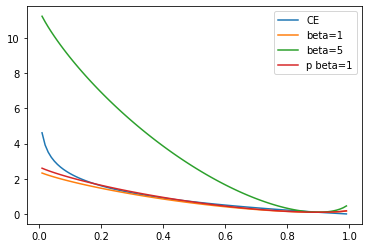

In [61]:
advp = np.arange(1, 101) / 100
plt.plot(advp, ce(advp), label="CE")
plt.plot(advp, trades(p=0.9, advp=advp, beta=1.0), label="beta=1")
plt.plot(advp, trades(p=0.9, advp=advp, beta=5.0), label="beta=5")
plt.plot(advp, ptrades(p=0.9, advp=advp, beta=1.0), label="p beta=1")
#plt.plot(advp, trades(p=0.95, advp=advp, beta=1.0), label="beta=5")
plt.legend()

/home/arbiter/.pyenv/versions/3.7.4/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/arbiter/.pyenv/versions/3.7.4/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


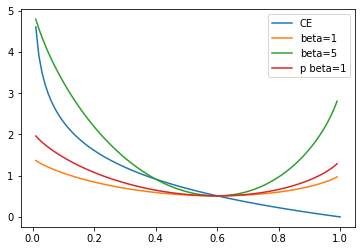

In [64]:
advp = np.arange(1, 101) / 100
plt.plot(advp, ce(advp), label="CE")
plt.plot(advp, trades(p=0.6, advp=advp, beta=1.0), label="beta=1")
plt.plot(advp, trades(p=0.6, advp=advp, beta=5.0), label="beta=5")
plt.plot(advp, ptrades(p=0.6, advp=advp, beta=1.0), label="p beta=1")

#plt.plot(advp, trades(p=0.95, advp=advp, beta=1.0), label="beta=5")
plt.legend()